In [84]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [9]:
filename = 'student-mat.csv'
data = np.genfromtxt(filename, delimiter=';')
print(data.shape)
print(data[0])

(396, 33)
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


In [24]:
dataset = pd.read_csv('student-mat.csv', sep=';')
data = dataset.drop(['school', 'sex', 'reason', 'address', 'guardian', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'], axis=1)
data.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,4,3,2,1,2,5,4,6,10,10


In [65]:
df_ = data.values
print(type(df_))
print(df_.shape)

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>
[18  4  4  2  2  4  3  4  1  1  3  6  5  6  6]
(395, 15)


[0, 10, 20, 30, 40, 50, 60, 70, 80]

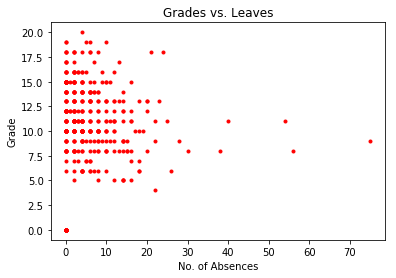

In [45]:
x = df_[:,-1]
plt.plot(df_[:,11], df_[:,-1], 'r.', label = 'G3')
#plt.plot(df_[:,11], df_[:,-2], 'k', label = 'G2')
#plt.plot(df_[:,11], df_[:,-3], 'b', label = 'G1')
plt.title('Grades vs. Leaves')
plt.ylabel('Grade')
plt.xlabel('No. of Absences')
#plt.legend()
plt.show()

(395,)
(395,)
[115   3  65   8  53   5  31   7  22   3  17   3  12   3  12   3   7   1
   5   1   4   1   3   1   1   1   1   1   1   1   1   1   1   1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 30 38 40 54 56 75]


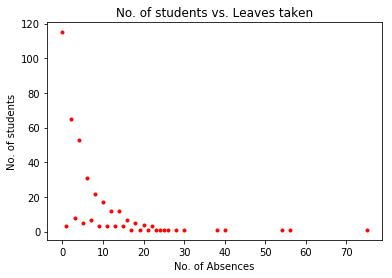

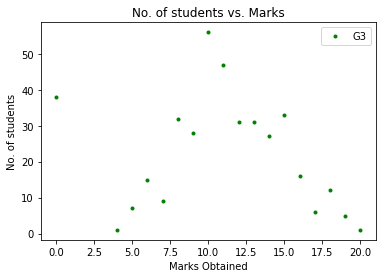

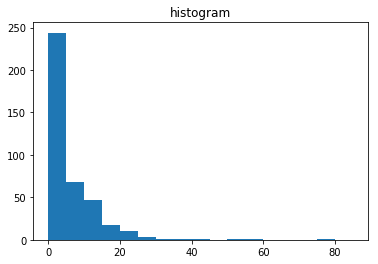

In [70]:
G3 = df_[:,-1]
G2 = df_[:,-2]
leaves = df_[:,11]
print(G2.shape)
print(leaves.shape)

valg, countg = np.unique(G3, return_counts = True)
vala, counta = np.unique(leaves, return_counts = True)
print(counta)
print(vala)
plt.figure()
plt.plot(vala, counta, 'r.', label = 'G3')
plt.title('No. of students vs. Leaves taken')
plt.ylabel('No. of students')
plt.xlabel('No. of Absences')

plt.figure()
plt.plot(valg, countg, 'g.', label = 'G3')
plt.title('No. of students vs. Marks')
plt.ylabel('No. of students')
plt.xlabel('Marks Obtained')
plt.legend()

plt.figure()
plt.hist(leaves, bins = range(0,90,5)) 
plt.title("histogram") 

plt.show()

In [86]:
grade = np.arange(0, 21, .5)
grade_lo = fuzz.trapmf(grade, [0, 0, 5, 7.5])
grade_avg = fuzz.trimf(grade, [5, 10, 15])
grade_hi = fuzz.trapmf(grade, [12.5, 15, 20, 20])
#print(grade_hi)

dub = np.arange(0,101,1)
dub_vlo = fuzz.trimf(dub, [0, 0, 25])
dub_lo = fuzz.trimf(dub, [0, 25, 50])
dub_avg = fuzz.trimf(dub, [25, 50, 75])
dub_hi = fuzz.trimf(dub, [50, 75, 100])
dub_vhi = fuzz.trimf(dub, [75, 100, 100])

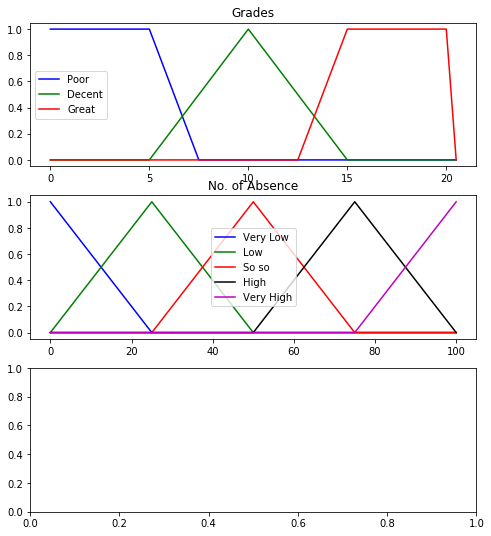

In [87]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(grade, grade_lo, 'b', linewidth=1.5, label='Poor')
ax0.plot(grade, grade_avg, 'g', linewidth=1.5, label='Decent')
ax0.plot(grade, grade_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Grades')
ax0.legend()

ax1.plot(dub, dub_vlo, 'b', linewidth=1.5, label='Very Low')
ax1.plot(dub, dub_lo, 'g', linewidth=1.5, label='Low')
ax1.plot(dub, dub_avg, 'r', linewidth=1.5, label='So so')
ax1.plot(dub, dub_hi, 'k', linewidth=1.5, label='High')
ax1.plot(dub, dub_vhi, 'm', linewidth=1.5, label='Very High')
ax1.set_title('No. of Absence')
ax1.legend()